<a href="https://colab.research.google.com/github/RakeshBhugra/Network-on-Chip-Temperature-Prediction/blob/main/NonRandomAutoKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc3

  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc3) to /tmp/pip-req-build-tyd3_4gt
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-tyd3_4gt
  Running command git checkout -q 172be42f1310cdbad48941494f84d65367de4f11
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc3-cp36-none-any.whl size=91635 sha256=fca1b3bbd5940f0d20400b9542cb641e27e9c74df5882dc8e42fc2aed9a2cd33
  Stored in directory: /tmp/pip-ephem-wheel-cache-4my9asv1/wheels/2d/b8/84/5f9abbcad32fc56a0fdd5d1b8c267221abb5ec582dde4371f7
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=2b5f0851f4f0562909f66a8c7cdae2a695189d7751e3b06bdd1cfa73d856cae3
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
!pip install autokeras

     |████████████████████████████████| 163kB 8.8MB/s 


In [ ]:
!sudo pip show autokeras

Name: autokeras
Version: 1.0.11
Summary: AutoML for deep learning
Home-page: http://autokeras.com
Author: Data Analytics at Texas A&M (DATA) Lab, Keras Team
Author-email: jhfjhfj1@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: packaging, pandas, scikit-learn, tensorflow
Required-by: 


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
from autokeras import StructuredDataRegressor

In [ ]:
 data = pd.read_excel('drive/MyDrive/NoC/data.xlsx')
data.drop(axis=1, columns=['Unnamed: 0'], inplace=True)

In [ ]:
data.head()

,r0-core,r1-core,r2-core,r3-core,r4-core,r5-core,r6-core,r7-core,r8-core,r9-core,r10-core,r11-core,r12-core,r13-core,r14-core,r15-core,Application_name,Simulation_Time,r0_a,r1_a,r2_a,r3_a,r4_a,r5_a,r6_a,r7_a,r8_a,r9_a,r10_a,r11_a,r12_a,r13_a,r14_a,r15_a,r0_ss,r1_ss,r2_ss,r3_ss,r4_ss,r5_ss,...,r13_ds,r14_ds,r15_ds,buffer,clean,total_received_packets,Total_received_Header_flit,Total_received_flits,Global_average_delay,Max_delay,Avg_waiting_time_in_each_buffer,Global_average_throughput,Throughput,Total_energy,Cores_energy,Routers_energy,Avg_power,Avg_cores_power,Avg_routers_power,Avg_power_per_router,Static_power,Avg_dynamic_power,Total_Area,Layer_Area,Area_per_core,Area_per_Router,Crossbar,VCAllocator,SWAllocator,Buffers,Layer_average_delay_(cycles),Layer_energy_(J),Layer_Routed_flits,Layer_Routed_flits_0,Layer_Routed_flits_1,Layer_Routed_flits_2,Layer_Routed_flits_3,Layer_Routed_flits_4,Layer_Routed_flits_5,Layer_Routed_flits_6
0,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,mpeg_ilp,100000,26983,115318,80069,71629,28898,58370,43846,52525,0,684,13889,52525,0,0,32,52525,59.1910,59.1968,59.7050,64.0252,59.3089,59.3711,...,27.3685,26.8208,26.6948,4,5000,26226,26224,157790,Max,389,44.4691,0.412345,0.263510,0.002614,0.002147,0.000467,2.613700e-08,2.147120e-08,4.665800e-09,2.916120e-10,1.477040e-10,1.439080e-10,35435000.0,35435000.0,4695230.0,158451,147760,0,333.866,10357.2,183.480,0.000467,597293,155829,74256,26180,182955,0,0,158073
1,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,mpeg_ilp,150000,2704,12122,8434,7522,3077,6223,4628,5490,0,47,1407,5491,0,0,6,5491,59.1905,59.1964,59.7050,64.0244,59.3081,59.3659,...,27.4154,26.8584,26.7304,4,5000,40032,40030,240715,Max,409,44.4117,0.399054,0.267818,0.003930,0.003232,0.000698,2.619690e-08,2.154680e-08,4.650030e-09,2.906270e-10,1.447990e-10,1.458280e-10,35435000.0,35435000.0,4695230.0,158451,147760,0,333.866,10357.2,183.238,0.000698,910689,237587,113976,39076,278994,0,0,241056
2,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,mpeg_ilp,200000,53461,230562,160284,143422,58191,116982,88035,104887,0,1092,27535,104887,0,0,57,104887,59.0712,59.0878,59.5949,63.9127,59.1885,59.2548,...,29.1429,28.1872,27.9162,4,5000,52552,52550,315932,Max,445,44.3671,0.402221,0.263540,0.005214,0.004294,0.000919,2.606790e-08,2.147230e-08,4.595580e-09,2.872240e-10,1.433450e-10,1.438790e-10,35435000.0,35435000.0,4695230.0,158451,147760,0,333.866,10357.2,183.163,0.000919,1194282,310860,149506,51819,365866,0,0,316231
3,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,mpeg_ilp,250000,2891,12022,8294,7548,2943,5830,4420,5524,0,71,1393,5519,0,0,0,5519,59.0697,59.0865,59.5952,63.9200,59.1859,59.2474,...,29.2049,28.2335,27.9577,4,5000,66400,66399,398360,Max,438,44.3600,0.396105,0.265786,0.006528,0.005378,0.001150,2.611020e-08,2.151140e-08,4.598770e-09,2.874230e-10,1.424900e-10,1.449330e-10,35435000.0,35435000.0,4695230.0,158451,147760,0,333.866,10357.2,183.066,0.001150,1506338,392359,188705,64493,462082,0,0,398699
4,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,mpeg_ilp,300000,81014,346103,240823,215495,86716,173973,131661,157340,0,1587,41388,157340,0,0,84,157340,59.0311,59.0514,59.5590,63.8786,59.1479,59.2171,...,30.6874,29.3985,28.9481,4,5000,78924,78923,473820,Max,436,44.3202,0.398757,0.263409,0.007813,0.006441,0.001372,2.604230e-08,2.147010e-08,4.572190e-09,2.857620e-10,1.419200e-10,1.438420e-10,35435000.0,35435000.0,4695230.0,158451,147760,0,333.866,10357.2,182.939,0.001372,1790864,466497,224747,76392,549105,0,0,474123


In [ ]:
X, y = data["r0-core r1-core r2-core r3-core r4-core r5-core r6-core r7-core r8-core r9-core r10-core r11-core r12-core r13-core r14-core r15-core Simulation_Time".split()], data['r0_ss']

In [ ]:
X

,r0-core,r1-core,r2-core,r3-core,r4-core,r5-core,r6-core,r7-core,r8-core,r9-core,r10-core,r11-core,r12-core,r13-core,r14-core,r15-core,Simulation_Time
0,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,100000
1,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,150000
2,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,200000
3,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,250000
4,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,6,11,8,4,-1,-1,7,0,9,-1,1,10,5,-1,2,3,350000
1016,6,11,8,4,-1,-1,7,0,9,-1,1,10,5,-1,2,3,400000
1017,6,11,8,4,-1,-1,7,0,9,-1,1,10,5,-1,2,3,450000
1018,6,11,8,4,-1,-1,7,0,9,-1,1,10,5,-1,2,3,500000


In [ ]:
y

0       59.1910
1       59.1905
2       59.0712
3       59.0697
4       59.0311
         ...   
1015    60.6388
1016    60.6580
1017    60.6473
1018    60.6087
1019    60.6400
Name: r0_ss, Length: 1020, dtype: float64

In [ ]:
1020 - 337

683

In [ ]:
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = X[:683], X[683:], y[:683], y[683:]

(1020, 17) (1020,)


In [ ]:
X_train

,r0-core,r1-core,r2-core,r3-core,r4-core,r5-core,r6-core,r7-core,r8-core,r9-core,r10-core,r11-core,r12-core,r13-core,r14-core,r15-core,Simulation_Time
0,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,100000
1,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,150000
2,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,200000
3,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,250000
4,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,-1,3,-1,8,5,2,9,0,10,11,6,-1,4,-1,7,1,500000
679,-1,3,-1,8,5,2,9,0,10,11,6,-1,4,-1,7,1,550000
680,2,0,11,-1,5,7,9,1,3,8,-1,-1,-1,10,4,6,100000
681,2,0,11,-1,5,7,9,1,3,8,-1,-1,-1,10,4,6,150000


In [ ]:
y_train

0      59.1910
1      59.1905
2      59.0712
3      59.0697
4      59.0311
        ...   
678    66.6175
679    66.6235
680    59.1815
681    59.1942
682    59.0803
Name: r0_ss, Length: 683, dtype: float64

In [ ]:
y_test

683     59.0720
684     59.0280
685     59.0352
686     59.0181
687     59.0143
         ...   
1015    60.6388
1016    60.6580
1017    60.6473
1018    60.6087
1019    60.6400
Name: r0_ss, Length: 337, dtype: float64

In [ ]:
search = StructuredDataRegressor(max_trials=15, loss='mean_squared_error')

INFO:tensorflow:Reloading Oracle from existing project ./structured_data_regressor/oracle.json
INFO:tensorflow:Reloading Tuner from ./structured_data_regressor/tuner0.json


In [ ]:
search.fit(x=X_train, y=y_train, verbose=1)

INFO:tensorflow:Oracle triggered exit
Epoch 1/52
22/22 [==============================] - 0s 3ms/step - loss: 3663.2954 - mean_squared_error: 3663.2954
Epoch 2/52
22/22 [==============================] - 0s 3ms/step - loss: 3537.2598 - mean_squared_error: 3537.2598
Epoch 3/52
22/22 [==============================] - 0s 3ms/step - loss: 3364.5039 - mean_squared_error: 3364.5039
Epoch 4/52
22/22 [==============================] - 0s 3ms/step - loss: 3139.1150 - mean_squared_error: 3139.1150
Epoch 5/52
22/22 [==============================] - 0s 3ms/step - loss: 2812.7695 - mean_squared_error: 2812.7695
Epoch 6/52
22/22 [==============================] - 0s 3ms/step - loss: 2398.4492 - mean_squared_error: 2398.4492
Epoch 7/52
22/22 [==============================] - 0s 3ms/step - loss: 1887.8259 - mean_squared_error: 1887.8259
Epoch 8/52
22/22 [==============================] - 0s 3ms/step - loss: 1407.0222 - mean_squared_error: 1407.0222
Epoch 9/52
22/22 [==============================] 

In [ ]:
mse, _ = search.evaluate(X_test, y_test, verbose=1)

11/11 [==============================] - 0s 3ms/step - loss: 41.9005 - mean_squared_error: 41.9005


In [ ]:
mse

41.90053176879883

In [ ]:
X_test[:1]

,r0-core,r1-core,r2-core,r3-core,r4-core,r5-core,r6-core,r7-core,r8-core,r9-core,r10-core,r11-core,r12-core,r13-core,r14-core,r15-core,Simulation_Time
683,2,0,11,-1,5,7,9,1,3,8,-1,-1,-1,10,4,6,250000


In [ ]:
yhat = search.predict(X_test[:1])
print('Predicted: %.3f' % yhat[0])

Predicted: 67.609


Real value is 66.9292

In [ ]:
model = search.export_model()

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 17)                0         
_________________________________________________________________
normalization (Normalization (None, 17)                35        
_________________________________________________________________
dense (Dense)                (None, 32)                576       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)               

In [ ]:
#model.save('drive/MyDrive/NoC')

INFO:tensorflow:Assets written to: drive/MyDrive/NoC/assets


In [ ]:
model.save_weights('drive/MyDrive/NoC/krandom.h5_weights')

In [ ]:
y_test

683     59.0720
684     59.0280
685     59.0352
686     59.0181
687     59.0143
         ...   
1015    60.6388
1016    60.6580
1017    60.6473
1018    60.6087
1019    60.6400
Name: r0_ss, Length: 337, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
 l = []
# n = X_test.size
for i in range(10):
  yhat = search.predict(X_test[i:i+1])
  l.append(yhat[0])

In [ ]:
print(l)
print(len(l))

[array([67.60925], dtype=float32), array([65.08759], dtype=float32), array([62.81201], dtype=float32), array([60.83908], dtype=float32), array([58.886066], dtype=float32), array([57.51555], dtype=float32), array([56.52234], dtype=float32), array([48.954166], dtype=float32), array([50.360245], dtype=float32), array([51.9592], dtype=float32)]
10


In [ ]:
X_test

In [ ]:
print(X_test[0:1])

In [ ]:
len(l)

In [ ]:
len(y_test[:10])

10

In [ ]:
l2=[]
for i in y_test[:10]:
  l2.append(i)

In [ ]:
l1 = []
for i in range(len(l)):
  l1.append(l[i][0])

In [ ]:
print(len(l1), len(l2))

10 10


In [ ]:
c=0
for i in range(len(l2)):
  print(l1[i], l2[i])
  c+=1

67.60925 59.072
65.08759 59.028
62.81201 59.0352
60.83908 59.0181
58.886066 59.0143
57.51555 59.0006
56.52234 59.0008
48.954166 61.2899
50.360245 61.2903
51.9592 61.1704


<Figure size 432x288 with 0 Axes>

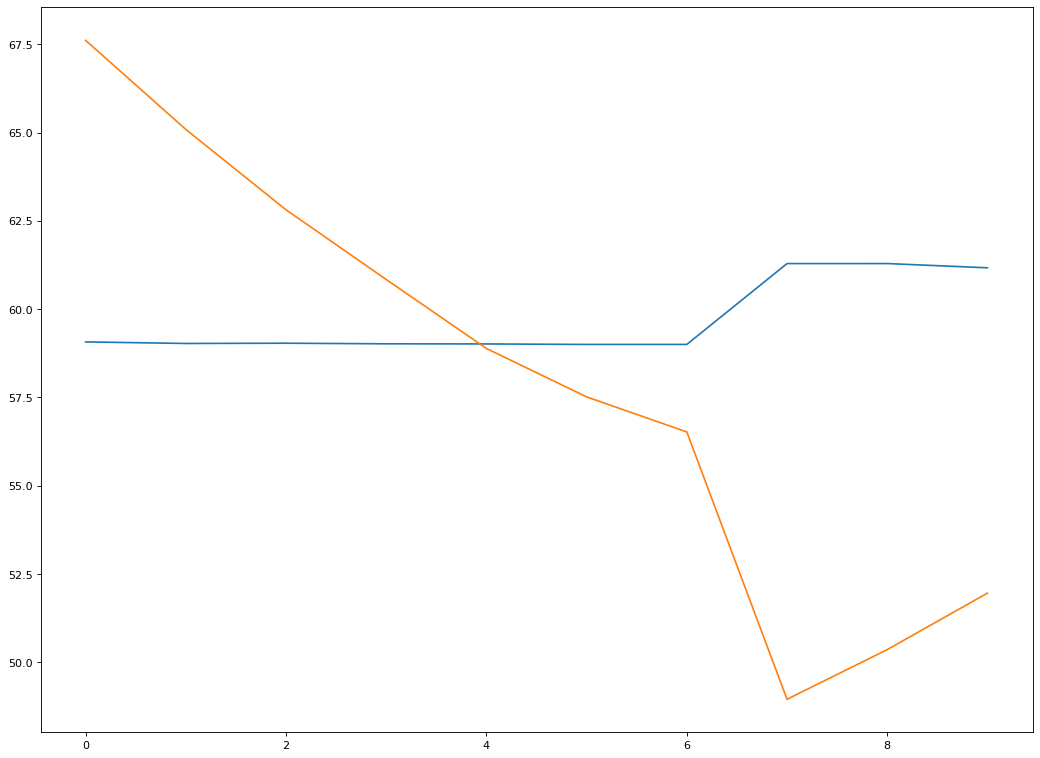

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
fig = plt.gcf()
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
# plt.plot(l)
plt.plot(l2)
plt.plot(l1)

In [ ]:
l3 = []
c=0
for i in range(len(l2)):
  l3.append(l1[c]-l2[c])
  c+=1

<Figure size 432x288 with 0 Axes>

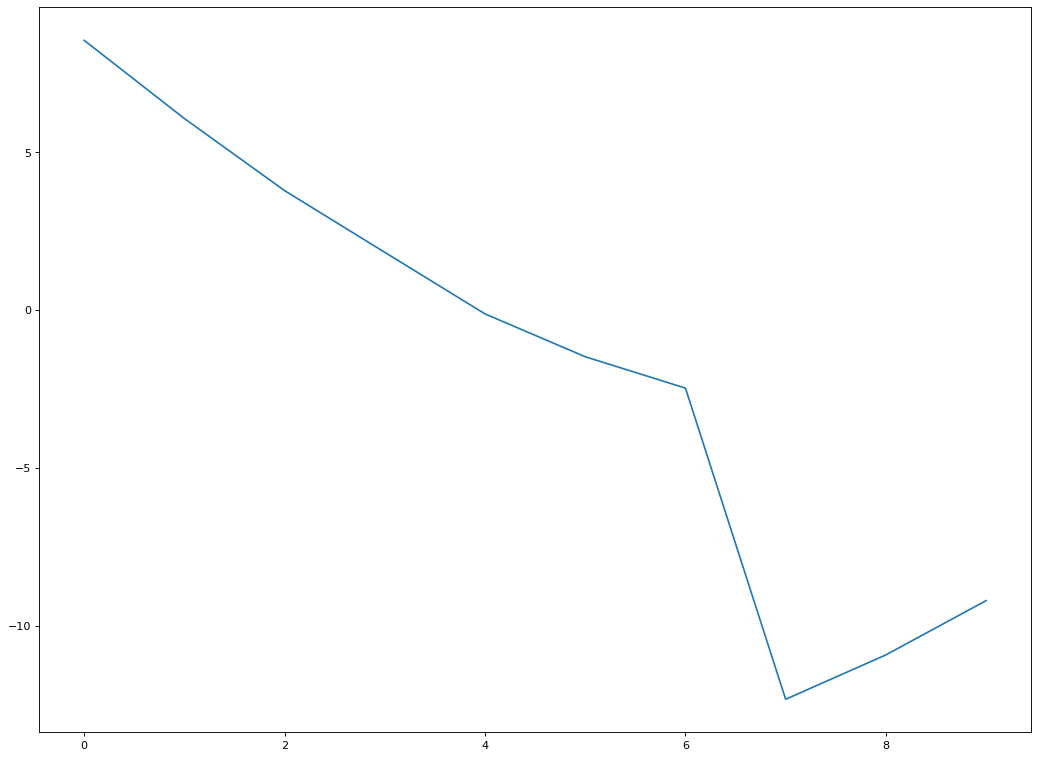

In [ ]:
fig = plt.gcf()
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
# plt.plot(l)
plt.plot(l3)

Plot of the difference

In [ ]:
import timeit
start_time = timeit.default_timer()
k = search.predict(X_test[0:1])
elapsed = timeit.default_timer() - start_time

In [ ]:
print(elapsed)

1.716525991000026


In [ ]:
import timeit
start_time = timeit.default_timer()
k = search.predict(X_test[1:2])
elapsed = timeit.default_timer() - start_time

In [ ]:
print(elapsed)

1.4037323940000306
